In [1]:
from __future__ import division

%pylab inline
import PIL.Image as pil
import tensorflow.compat.v1 as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display
import os
import numpy as np

img_height=128
img_width=416
ckpt_file = 'models/model-190532'
fh = open('misc/sample.png', 'rb')
I = pil.open(fh)
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)

Populating the interactive namespace from numpy and matplotlib
Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')

Instructions for updating:
Please use `layer.__call__` method instead.


In [3]:
saver = tf.train.Saver([var for var in tf.model_variables()]) 
with tf.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')

INFO:tensorflow:Restoring parameters from models/model-190532


(1, 128, 416, 1)


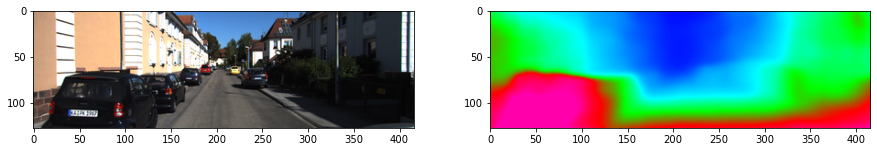

In [4]:
import cv2
figure(figsize=(15,15))
subplot(1,2,1); imshow(I)

subplot(1,2,2) 
D = normalize_depth_for_display(pred['depth'][0,:,:,0])
D = cv2.applyColorMap((D*255).astype('uint8'), cv2.COLORMAP_RAINBOW)
imshow(D)

print(pred['depth'].shape)

In [ ]:
with tf.Session() as session:
    saver.restore(session, ckpt_file)
    pref = sfm.inference(I[None,:,:,:], session, mode='pose')